# Weather Data - Exploratory Data Analysis
## Data Science - CS 334
--------------------------------------------

- In this part of the assignment we will perform some investigations to discover the hidden patterns/trends, verify assumptions with the help of statistics and graphical representations in the data.
- Use the cleaned `weather_data` file to do this part.

### Importing Libraries
---------------------------

In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [277]:
df = pd.read_pickle('weather_clean.pkl')
print(df.shape)
df.head()

(366, 23)


,CloudCover,Events,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Humidity,...,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees,Date
0,6.0,Rain,46.0,29.0,74.0,30.45,64.0,10.0,22.0,63.0,...,13.0,40.0,26.0,52.0,30.01,39.0,10.0,0.01,268.0,2014-12-01
1,7.0,Rain-Snow,40.0,29.0,92.0,30.71,42.0,10.0,24.0,72.0,...,15.0,27.0,17.0,51.0,30.40,33.0,2.0,0.10,62.0,2014-12-02
2,8.0,Rain,49.0,38.0,100.0,30.40,51.0,10.0,29.0,79.0,...,12.0,42.0,24.0,57.0,29.87,37.0,1.0,0.44,254.0,2014-12-03
3,3.0,None,24.0,33.0,69.0,30.56,43.0,10.0,25.0,54.0,...,12.0,21.0,13.0,39.0,30.09,30.0,10.0,0.00,292.0,2014-12-04
4,5.0,Rain,37.0,26.0,85.0,30.68,42.0,10.0,22.0,66.0,...,10.0,25.0,12.0,47.0,30.45,26.0,5.0,0.11,61.0,2014-12-05


You can see the statistics for all the columns using the `describe` function in pandas.

In [278]:
df.describe(include='all')

,CloudCover,Events,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Humidity,...,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees,Date
count,366.000000,366,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366
unique,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,366
top,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-19 00:00:00
freq,NaN,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-01 00:00:00
mean,4.707650,NaN,45.475410,26.964481,83.576503,30.155328,58.931694,9.907104,20.620219,66.021858,...,10.680328,38.959016,32.245902,48.308743,29.925956,43.327869,6.715847,0.101557,200.081967,NaN
std,2.373206,NaN,18.317241,8.566747,13.683743,0.232095,20.047156,0.707768,5.762945,14.433392,...,3.491515,19.870153,21.811639,17.414221,0.241768,18.734530,4.051196,0.294215,98.707393,NaN
min,0.000000,NaN,-6.000000,0.000000,46.000000,29.580000,18.000000,2.000000,8.000000,28.000000,...,4.000000,-11.000000,-18.000000,16.000000,29.160000,-3.000000,0.000000,0.000000,1.000000,NaN
25%,3.000000,NaN,32.000000,21.000000,74.250000,30.000000,42.000000,10.000000,16.000000,56.000000,...,8.000000,24.000000,16.250000,35.000000,29.760000,30.000000,2.000000,0.000000,113.000000,NaN


## Distributions + Correlation
------------------------------------

#### Use plots to support your findings.
- The world of Data Science revolves around the probability distributions and the core of probability distribution is focused on Normal distributions.This is from where we draw our assumptions about a feature/variable and make hypothesis. So which variables are normally distributed in this data? Do you see any variables which shows bi-modal distribution? Tri-modal?
- In reality, data is not always spread consistently. One of the reasons might be that there is not sufficient information available from one group of data. Another reason might be that if data is collected through forms/devices then some people might choose to not enter the data or the device might be faulty. Hence, we need to know whether there is any feature in the data which is skewed. Are there any variables which are skewed? If yes then plot those.
- Is Gust Speed effected by any other variable in the data? If yes, then which column/columns? 
- Show the relatioship between all the variables. Explain these relations. (Linear, positive, negative, not-related,etc)
- How can we detect multicollinearity? Which plot can be used? Which variables fall under this? [Click here to read up on `multi-collinearity`](https://towardsdatascience.com/multicollinearity-in-data-science-c5f6c0fe6edf) since we haven't covered this in class. Google is your friend so use it!

## 1) Making a Histogram to check for Normality
- Made Dist Plots for all separate weather columns to show Normalisation and Bimodial Distributions

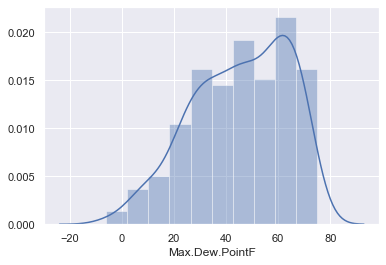

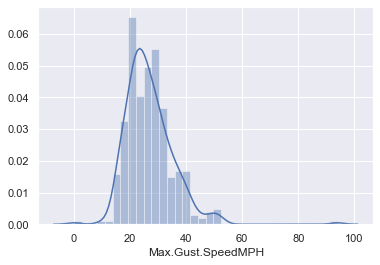

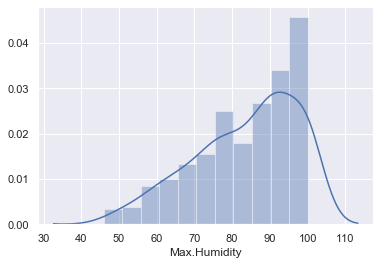

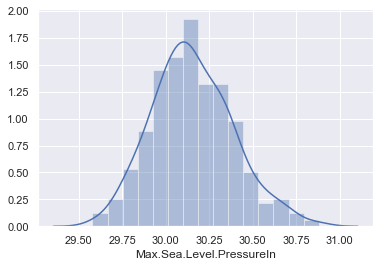

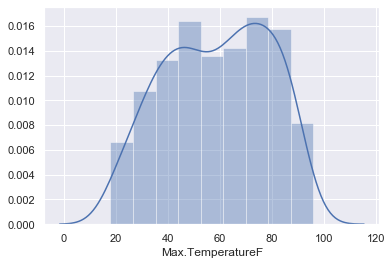

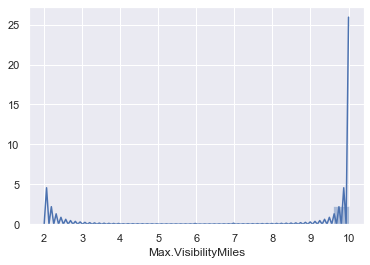

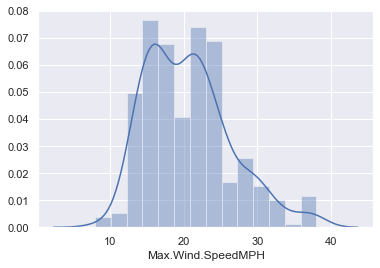

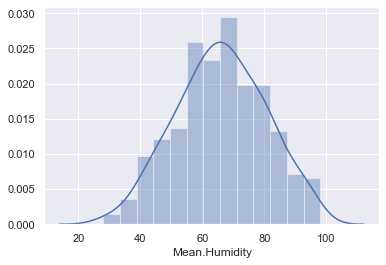

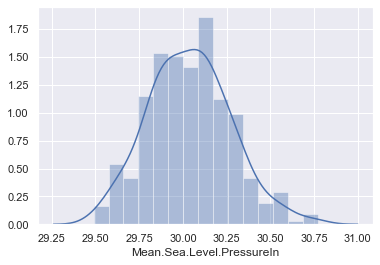

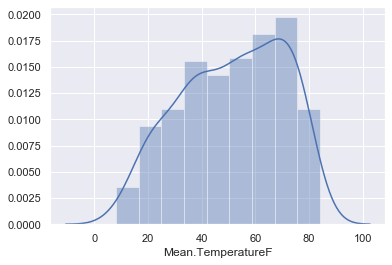

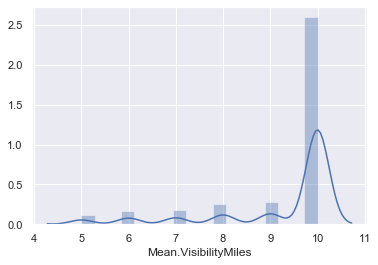

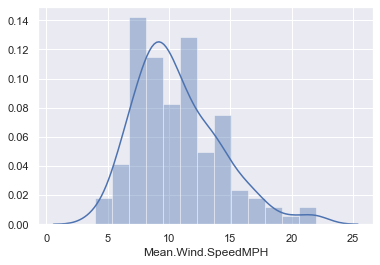

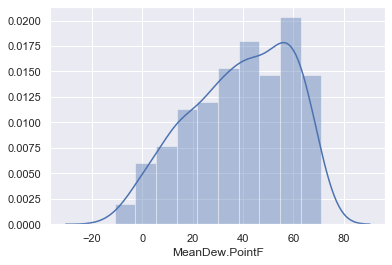

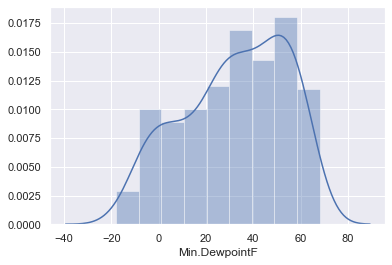

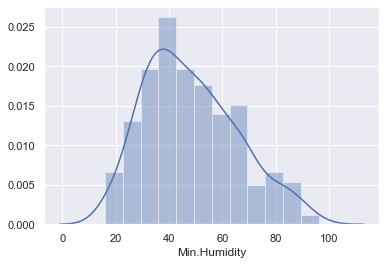

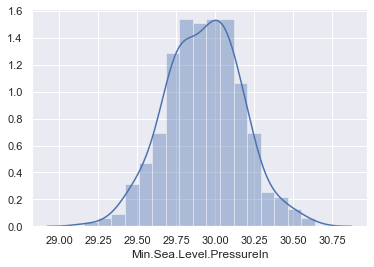

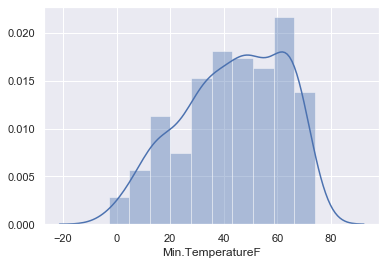

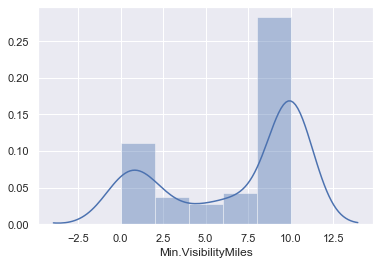

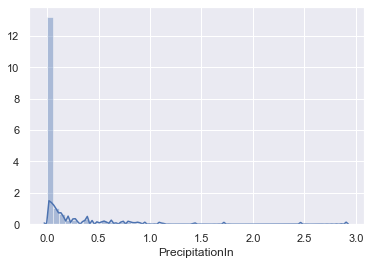

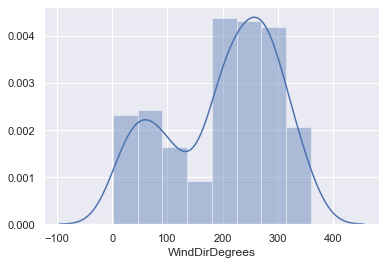

In [279]:
newdf = df.loc[: , 'Max.Dew.PointF':'WindDirDegrees']
for i, col in enumerate(newdf.columns):
    plt.figure(i)
    sns.distplot(newdf[col])

### Separating the Normally Distributed and Bi-modal Variables
- The Bi-modal columns were found by simply analysing the histograms made before.
- Using scipy's normal test function, I was able to separate the normal distributed columns.

In [280]:
from scipy import stats
arr1 = []
arr2 = []
for i in range (0,20): 
     p = stats.normaltest(newdf[newdf.columns[i]])
     alpha = 0.5e-1        
     if i == 17 or i == 19:
        arr1.append(newdf.columns[i])
     elif p[1] < alpha:  
         continue   
     else:
         arr2.append(newdf.columns[i])

### Displaying the Histograms of the Bi-modal Variables

Bi-modal Distributions: 

Min.VisibilityMiles

WindDirDegrees



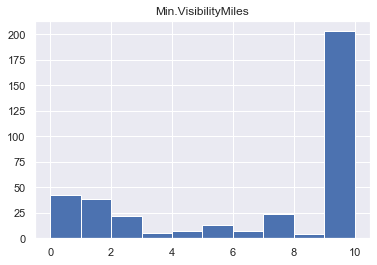

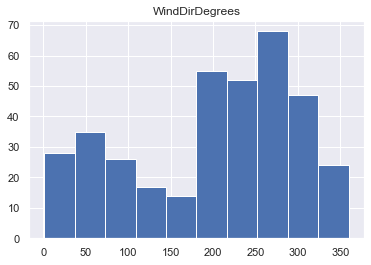

In [281]:
print("Bi-modal Distributions: " + "\n")
for p in arr1:
    print (p + "\n")
    newdf.hist(column=p)

### Displaying the Histograms of the Normally Distributed Variables

Normal Distributions: 

Mean.Humidity

Mean.Sea.Level.PressureIn

Min.Sea.Level.PressureIn



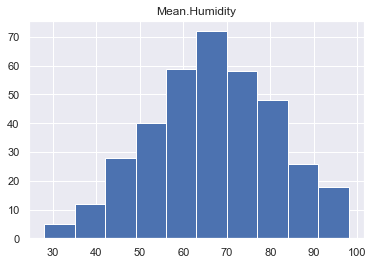

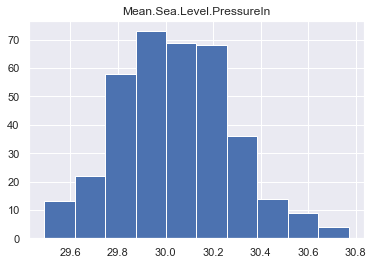

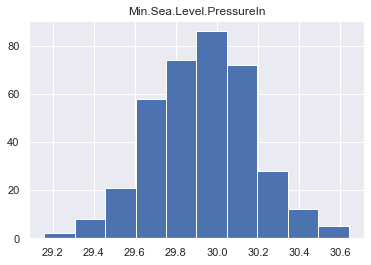

In [282]:
print("Normal Distributions: " + "\n")
for p in arr2:
    print (p + "\n")
    newdf.hist(column=p)

## 2) Skewness Check
- A negative skewness value indicates that the column is skewed to the left hand side of the distribution.
- A positive skewness value indicates that the column is skewed to the right hand side of the distribution.

In [283]:
arra1 = []
arra2 = []
for x in range(0,20):
    skew_val = newdf[newdf.columns[x]].skew()
    if (skew_val < 0):
        arra1.append(newdf.columns[x])
    elif (skew_val > 0):
        arra2.append(newdf.columns[x])

### Left Skewed Histograms


Left Skewed: 

Max.Dew.PointF

Max.Humidity

Max.TemperatureF

Max.VisibilityMiles

Mean.Humidity

Mean.TemperatureF

Mean.VisibilityMiles

MeanDew.PointF

Min.DewpointF

Min.Sea.Level.PressureIn

Min.TemperatureF

Min.VisibilityMiles

WindDirDegrees



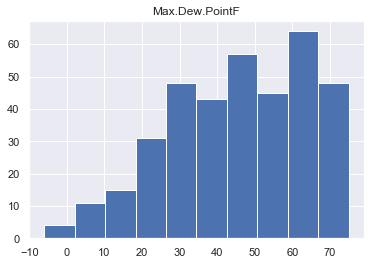

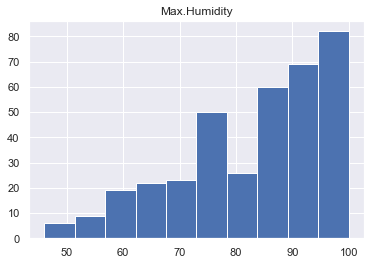

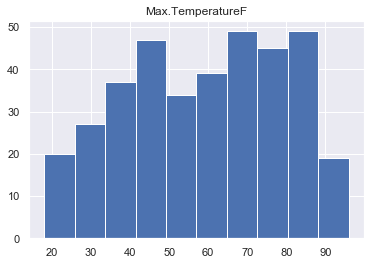

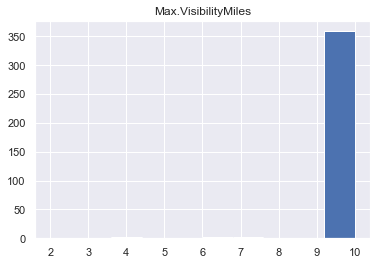

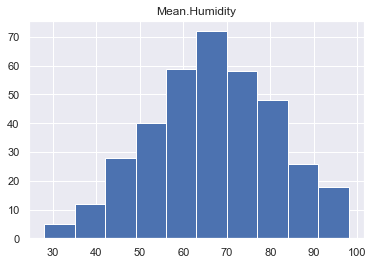

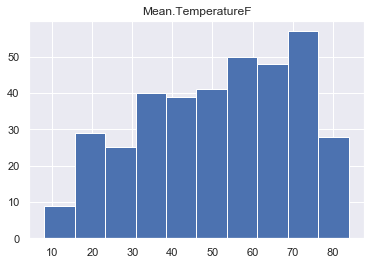

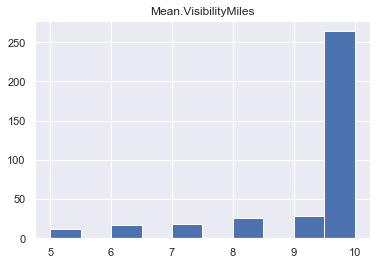

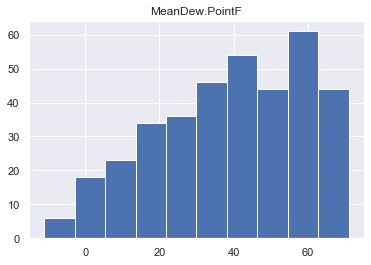

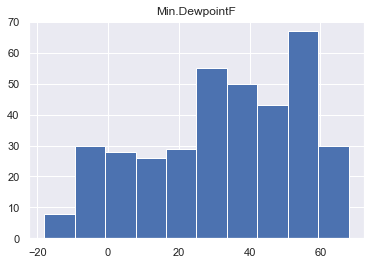

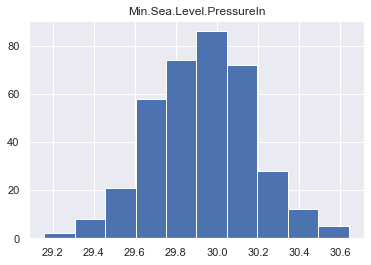

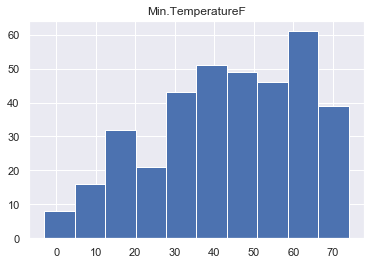

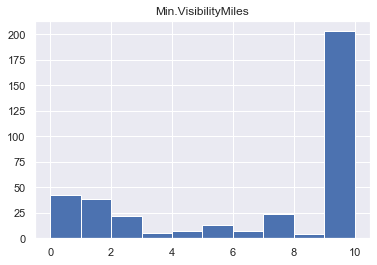

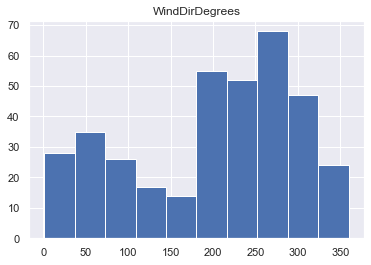

In [284]:
print("\nLeft Skewed: " + "\n")
for p in arra1:
    print (p + "\n")
    newdf.hist(column=p)

### Right Skewed Histograms


Right Skewed: 

Max.Gust.SpeedMPH

Max.Sea.Level.PressureIn

Max.Wind.SpeedMPH

Mean.Sea.Level.PressureIn

Mean.Wind.SpeedMPH

Min.Humidity

PrecipitationIn



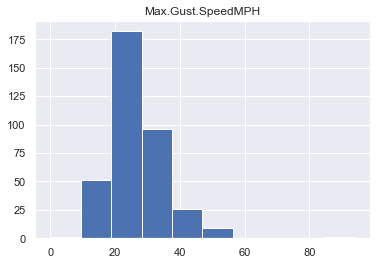

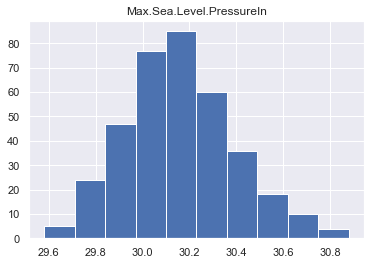

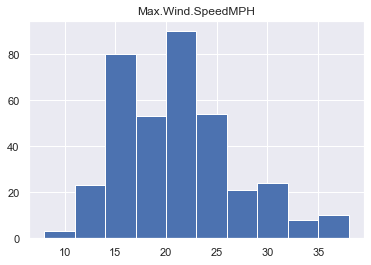

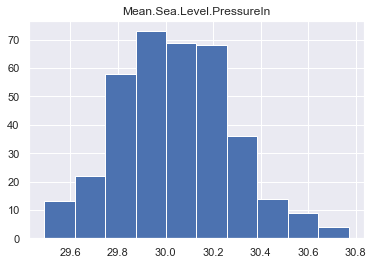

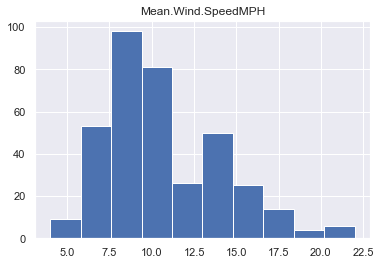

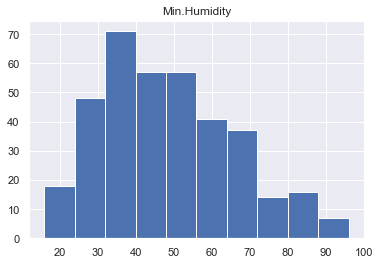

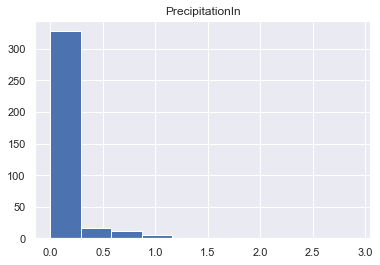

In [285]:
print("\nRight Skewed: " + "\n")
for p in arra2:
    print (p + "\n")
    newdf.hist(column=p)

### Skewness of all Variables In Statistical Numbers
- Upper Result is also supported by these numbers

In [286]:
newdf.skew()

Max.Dew.PointF              -0.436778
Max.Gust.SpeedMPH            1.805719
Max.Humidity                -0.626384
Max.Sea.Level.PressureIn     0.330029
Max.TemperatureF            -0.162292
Max.VisibilityMiles         -8.350676
Max.Wind.SpeedMPH            0.750892
Mean.Humidity               -0.070048
Mean.Sea.Level.PressureIn    0.243722
Mean.TemperatureF           -0.270501
Mean.VisibilityMiles        -1.864544
Mean.Wind.SpeedMPH           0.829347
MeanDew.PointF              -0.382789
Min.DewpointF               -0.368243
Min.Humidity                 0.496616
Min.Sea.Level.PressureIn    -0.007247
Min.TemperatureF            -0.377408
Min.VisibilityMiles         -0.650277
PrecipitationIn              5.288869
WindDirDegrees              -0.475575
dtype: float64

## 3) Gust Speed comparison with Other Variables Throuh Scatter Plots
- To check if Gust Speed is affected by any other data, various Scatter Plots are made with the Max Gust on the x-axis and the other variables on the y-axis.
- From the scatter plots, it can be seen that Max.Wind.SpeedMPH and Mean.Wind.SpeedMPH are the variables affecting Max Gust Speed as they show a Linear Relationship.

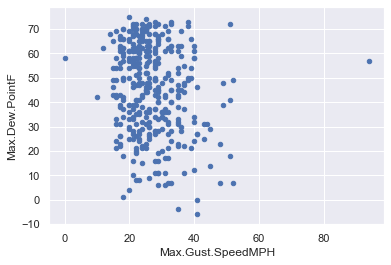

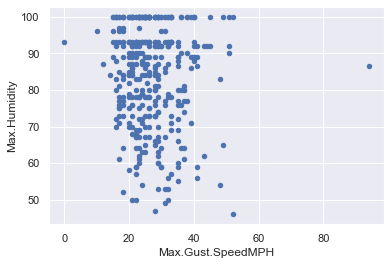

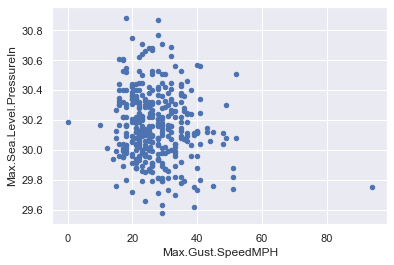

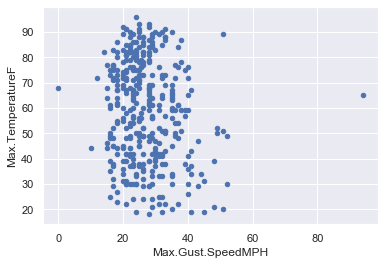

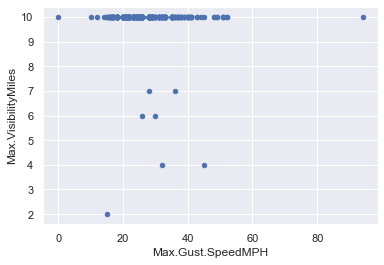

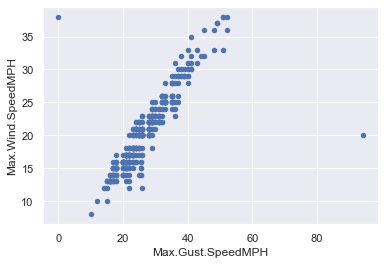

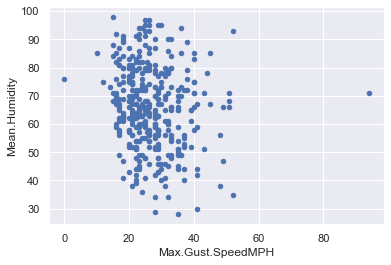

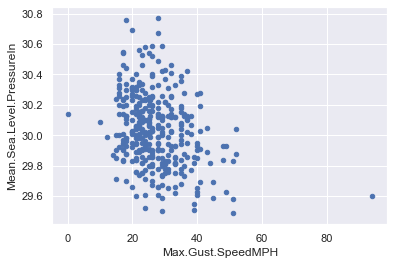

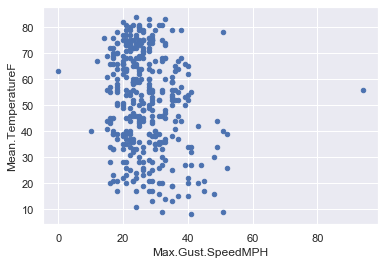

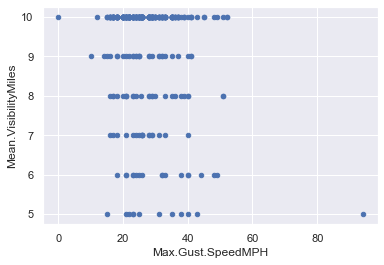

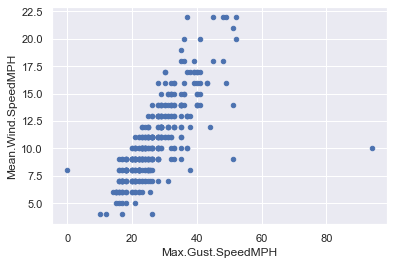

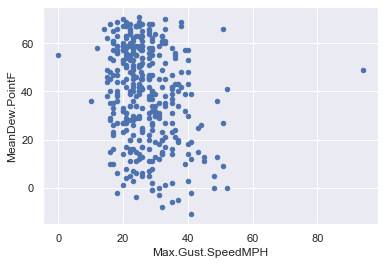

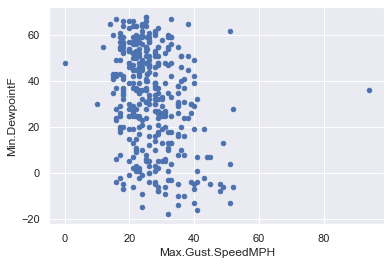

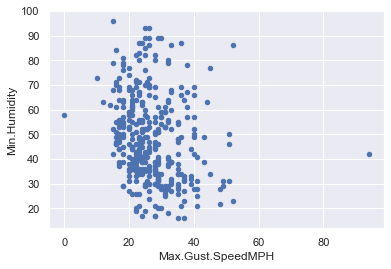

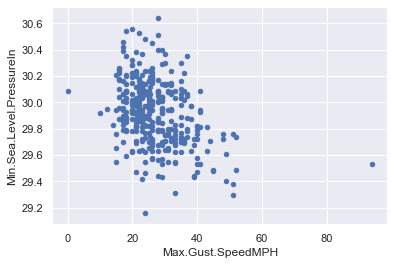

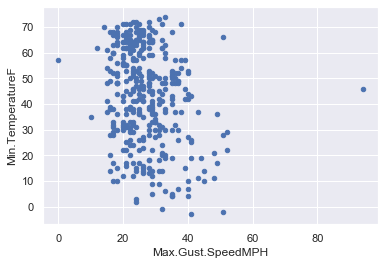

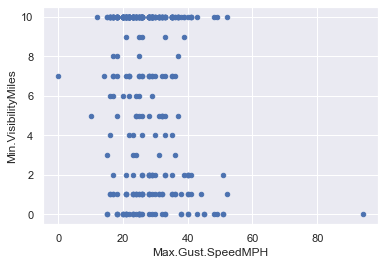

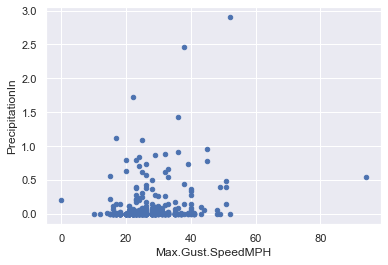

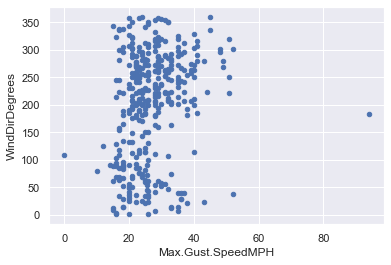

In [287]:
for i in range (0,20):
    if i == 1:
        continue
    else:
        newdf.plot(kind='scatter', x='Max.Gust.SpeedMPH', y=newdf.columns[i], color='b')

## 4) Showing the relatioship between all the Variables
- The relationships can be seen by the Pair Plot made (Png File).
- Linear relationship indicates having a relationship between two variables (a straight-line relationship) in which if one variable changes, the other also changes.
- Positive relationship is a relationship between two variables in which both variables move in the same direction. If one variable decreases, the other also decreases and vice versa.
- Negative relationship is a relationship between two variables in which both variables move in the opposite direction. Here if one variable increases, the other decreases and vice versa.
- Not-related relationship refers to when there is no relationship between variables, as in if one variable changes, it won't affect the other variable.

In [288]:
saveFile = sns.pairplot(newdf)
plt.savefig("pair.png")
plt.close()

## 5) Detecting Multicolinearity
- Multicolinearity indicates variables which have a relationship with more than one variable.
- Using the already plotted pair Plot in the previous part, those variables which have more than one linear relationships (I'm considering the linearity for this case) are considered multicollinear. 


In [289]:
# Collinear Plots
for i in range(0,20):
    if i == 5 or i == 10 or i == 17 or i == 18 or i == 19:
        continue
    else:
        print(newdf.columns[i])

Max.Dew.PointF
Max.Gust.SpeedMPH
Max.Humidity
Max.Sea.Level.PressureIn
Max.TemperatureF
Max.Wind.SpeedMPH
Mean.Humidity
Mean.Sea.Level.PressureIn
Mean.TemperatureF
Mean.Wind.SpeedMPH
MeanDew.PointF
Min.DewpointF
Min.Humidity
Min.Sea.Level.PressureIn
Min.TemperatureF


## General Observations
----------------------------
#### Use plots to support your findings.
- Which events are the most common?

## Time Plots
------------

In [290]:
df['Date'].min(), df['Date'].max()

(Timestamp('2014-12-01 00:00:00'), Timestamp('2015-12-01 00:00:00'))

So the time period of the data is a whole year from December 2014 to December 2015. 

### Temprature all around the year
#### Use plots to support your findings.

-  We want to figure out the hottest and coldest months of the year and also identify the seasons as well. Time plots will help us to answer these questions.
- How does the temprature vary between the months? Draw a plot and explain the trend. Also show the mean and median value of temprature on the plot as well. `Hint:` Using Horizontal lines
- Now we want to show how much the temprature varies on the same plot. Hint: See the matplotlib or documentation to calculate and plot the variation of the temprature on the same plot using the standard deviation.
- For each month find the `Mean.TemperatureF` and show the trend using a scatter plot. What can you observe?
- Is there any trend by how the `Mean.TemperatureF` changes with days of a week? Which day is the coldest and which is the hottest according to the data?
- From June to August, show the correlation between `Mean.VisibilityMiles` and `Mean.Humidity` if there is any using a single plot. `Hint:` Use a line plot. Is there anything interesting that you observe?
- Use `rolling mean` to show the change of `Mean.TemperatureF` weekly and monthly all year round. (Weakly rolling mean and Monthly rolling mean.)
- Use a suitable visualization to show counts of different `Events` per month. Which event occured the most and during which month?
- For each month, plot the minimum, maximum and average temprature. Do you see any trends? Draw a comparison between the values for all the months.
- Plot the temperature of hottest and coldest day of every month on same plot.

## 1) Hottest and Coldest Months
- I found the maximum and minimum values of the Temperatures using the max and min functions and then I used loc to look up the corresponding months to those maximum and minimum values
- Then I used a pivot Table to plot the Max and Min temperature vs Month graph with Month being my Index

Using the following categories for Months:
- Months 12 to 2 : Winter
- Months 3 to 5: Spring
- Months 6 to 8: August
- Months 9 to 11: Fall

In [291]:
tempDF = df.loc[: , ['Max.TemperatureF','Mean.TemperatureF','Min.TemperatureF','Date']]

tempDF['Month'] = pd.DatetimeIndex(tempDF['Date']).month

max_temp = tempDF['Max.TemperatureF'].max()
min_temp = tempDF['Min.TemperatureF'].min()

hot_res = tempDF.loc[tempDF['Max.TemperatureF'] == max_temp,'Month'].iloc[0]
cold_res = tempDF.loc[tempDF['Min.TemperatureF'] == min_temp,'Month'].iloc[0]

if hot_res in range (3,5):
    print("The maximum temperature:", max_temp, "is in spring") 
elif hot_res in range (6,8):
    print("The maximum temperature:", max_temp, "is in summer")  
elif hot_res in range (9,11):
    print("The maximum temperature:", max_temp, "is in fall")    
else:
    print("The maximum temperature:", max_temp, "is in winter")
    
if cold_res in range (3,5):
    print("The minimum temperature:", min_temp, "is in spring")  
elif cold_res in range (6,8):
    print("The minimum temperature:", min_temp, "is in summer")   
elif cold_res in range (9,11):
    print("The minimum temperature:", min_temp, "is in fall") 
else:
    print("The minimum temperature:", min_temp, "is in winter")

The maximum temperature: 96.0 is in fall
The minimum temperature: -3.0 is in winter


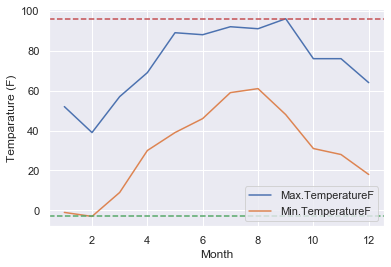

In [292]:
plt.plot(tempDF.pivot_table(values='Max.TemperatureF', index='Month', aggfunc=max), label='Max.TemperatureF')
plt.plot(tempDF.pivot_table(values='Min.TemperatureF', index='Month', aggfunc=min), label='Min.TemperatureF')
plt.xlabel('Month')
plt.ylabel('Temparature (F)')
plt.legend()
plt.axhline(y=max_temp, color='r', linestyle='--')
plt.axhline(y=min_temp, color='g', linestyle='--')

## 2) Varying Temperature Plot
- Used a pivot table to plot the Mean temperature vs Month graph with Month being my Index
- Temperature starts off with a heavy decrease from January to February, then linearly increases from March to August after which a steady decrease is observed from August to December

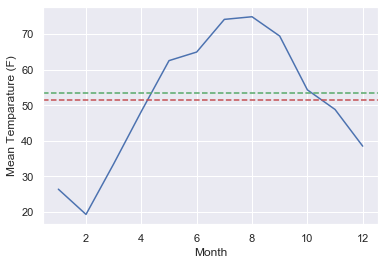

In [293]:
plt.plot(tempDF.pivot_table(values='Mean.TemperatureF', index='Month', aggfunc=np.mean))
plt.xlabel('Month')
plt.ylabel('Mean Temparature (F)')
plt.axhline(y=tempDF['Mean.TemperatureF'].mean(), color='r', linestyle='--')
plt.axhline(y=tempDF['Mean.TemperatureF'].median(), color='g', linestyle='--')

## 3) Varying Temperature on the same plot.
- I used a Mean Temperature as my y-axis in my first plot as it shows the average variation of the temperature
- In my second plot, I made a plot combining all three of the Temperature variables and showing the variations between them

Text(0, 0.5, 'Mean Temparature (F)')

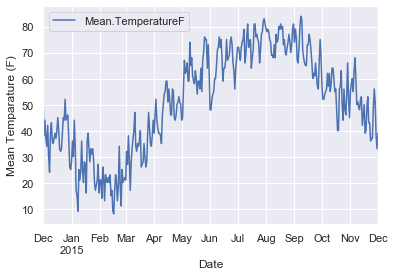

In [294]:
tempDF2 = df.loc[: , ['Mean.TemperatureF','Date']]
tempDF2.set_index('Date').plot()
plt.ylabel('Mean Temparature (F)')

Text(0, 0.5, 'Temparature (F)')

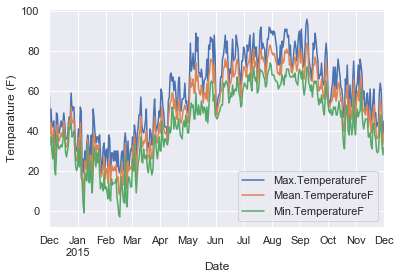

In [295]:
tempDF3 = df.loc[: , ['Max.TemperatureF','Mean.TemperatureF','Min.TemperatureF','Date']]
tempDF3.set_index('Date').plot()
plt.ylabel('Temparature (F)')

## 4) Using a Scatter Plot to show Trends for Mean.TemperatureF
- The trend observed here after looking at the scatter plots is that the temperature seems to increase from January to August as indicated by more points being shifted upwards in the scatter plot and then decreases from August to December as more points are observed in the lower area

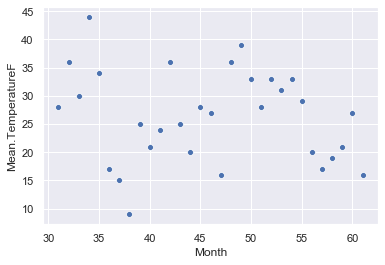

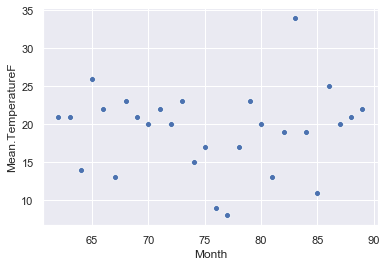

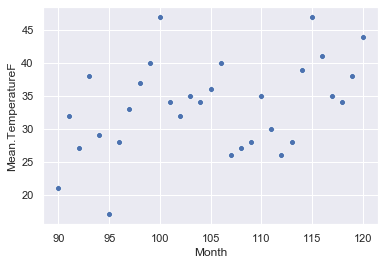

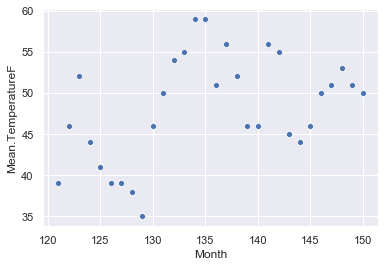

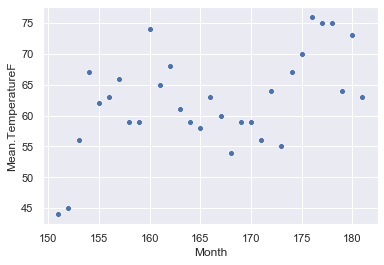

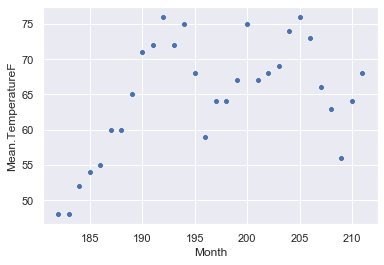

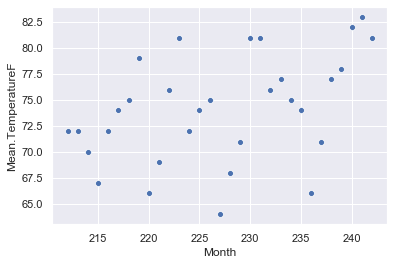

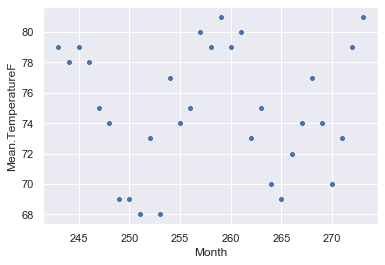

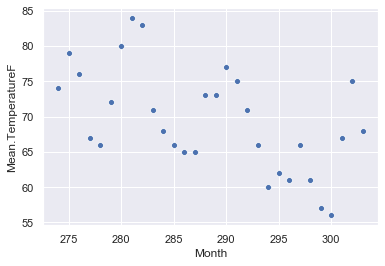

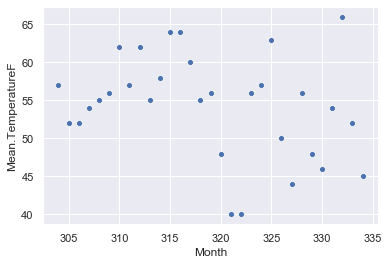

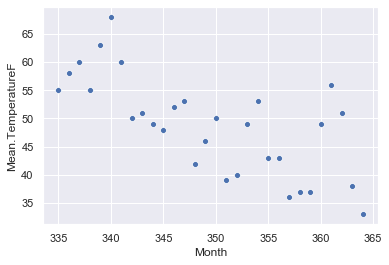

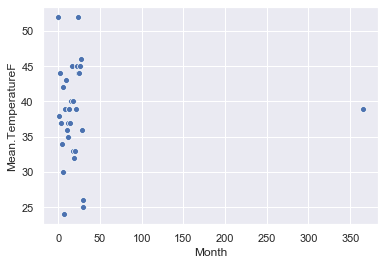

In [296]:
df['month'] = pd.DatetimeIndex(tempDF['Date']).month
for i in range(1,13):
    plt.figure(i)
    sns.scatterplot(df[df['month']== i].index,df[df['month']== i]['Mean.TemperatureF'])
    plt.xlabel('Month')

## 5) Trend by how the Mean.TemperatureF changes with Days of a Week
- The temperature is hottest on Wednesday and is at its lowest on either Saturday or Sunday

Text(0, 0.5, 'Mean Temparature (F)')

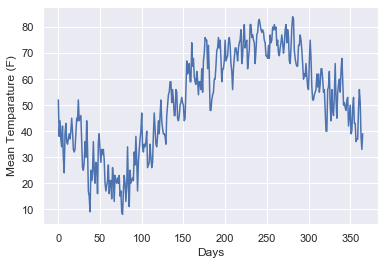

In [297]:
plt.plot(tempDF.index,tempDF['Mean.TemperatureF'])
plt.xlabel('Days')
plt.ylabel('Mean Temparature (F)')

## 6) Show the Correlation between Mean.VisibilityMiles and Mean.Humidity
- As the mean humidity increases, the mean visibility miles decreases, indicating a negative relationship between one another

Text(0, 0.5, 'Mean.Humidity')

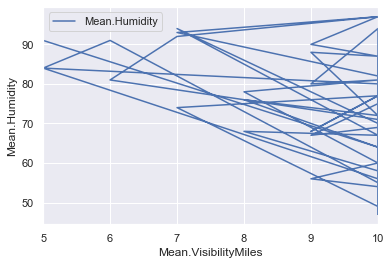

In [298]:
corrTempDF = df.loc[(df['month'] == 6) | (df['month'] == 7) | (df['month'] == 8)]
corrTempDF.plot.line(x='Mean.VisibilityMiles', y='Mean.Humidity')
plt.ylabel('Mean.Humidity')

## 7) Using Rolling Mean to show the changes of Mean.TemperatureF Weekly and Monthly

Text(0, 0.5, 'Mean Temparature (F)')

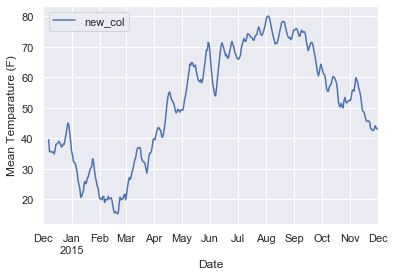

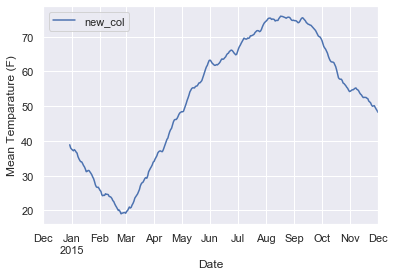

In [299]:
## For Weekly
tempDF4 = df.loc[: , ['Date']]
tempDF4['new_col'] = tempDF2['Mean.TemperatureF'].rolling(7).mean()
tempDF4.set_index('Date').plot()
plt.ylabel('Mean Temparature (F)')

## For Monthly
tempDF4 = df.loc[: , ['Date']]
tempDF4['new_col'] = tempDF2['Mean.TemperatureF'].rolling(30).mean()
tempDF4.set_index('Date').plot()
plt.ylabel('Mean Temparature (F)')

## 8) Show Counts of Different Events per Month
- As observed from the Graph, the Rain Event occured the most times during Month 12

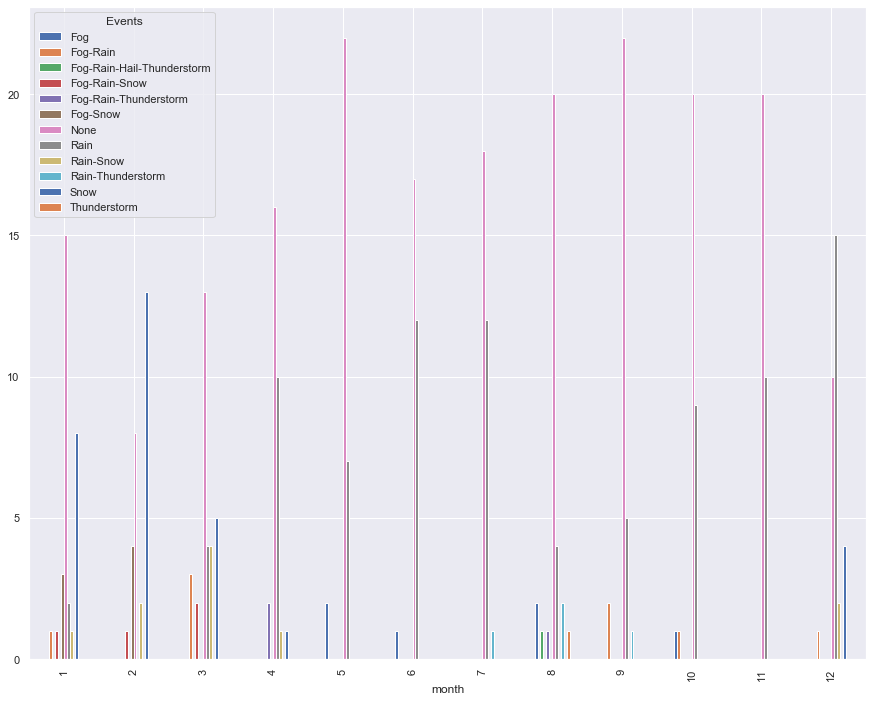

In [300]:
tDF = df.loc[: , ['Events', 'month']]
fig = plt.figure(figsize = (15,12))
ax = fig.gca()
dv = tDF.pivot_table(columns='Events', index='month', aggfunc=len)
dv.plot(kind='bar', ax=ax)

## 9) Plot the Minimum, Maximum and Average Temperature
- Looking at the Plots, it becomes apparent that August is the hottest month as the maximum temperature from all three Temperature variables (Max, Min, Mean) appears there  whereas February is the coldest month as it contains the lowest temperature from all three Temperature variables (Max, Min, Mean)

- We can clearly see that a trend appears in the form that he temperature lightly drops from January to February, steadily increases till August and then decreases from August to December

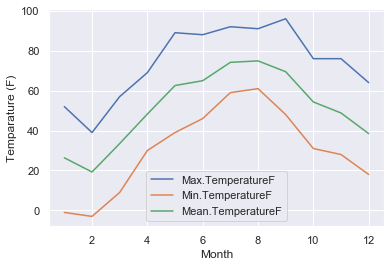

In [301]:
plt.plot(tempDF.pivot_table(values='Max.TemperatureF', index='Month', aggfunc=max), label='Max.TemperatureF')
plt.plot(tempDF.pivot_table(values='Min.TemperatureF', index='Month', aggfunc=min), label='Min.TemperatureF')
plt.plot(tempDF.pivot_table(values='Mean.TemperatureF', index='Month', aggfunc=np.mean),label='Mean.TemperatureF')
plt.xlabel('Month')
plt.ylabel('Temparature (F)')
plt.legend()

# 10) Plot the Temperature of Hottest and Coldest day of every Month

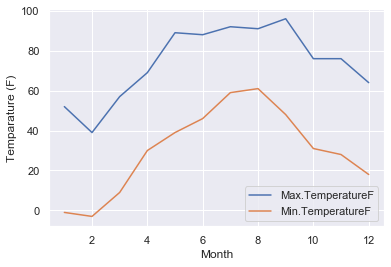

In [302]:
plt.plot(tempDF.pivot_table(values='Max.TemperatureF', index='Month', aggfunc=max), label='Max.TemperatureF')
plt.plot(tempDF.pivot_table(values='Min.TemperatureF', index='Month', aggfunc=min), label='Min.TemperatureF')
plt.xlabel('Month')
plt.ylabel('Temparature (F)')
plt.legend()